**Data Science Regression Project: Insurance Premium Prediction**


Download Dataset from- https://www.kaggle.com/noordeen/insurance-premium-prediction?select=insurance.csv

In [23]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
# loading the data into dataframe
dataframe1= pd.read_csv("/content/insurance.csv")
dataframe1.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
# to know the dimensions of the dataframe
dataframe1.shape

(1338, 7)

In [5]:
dataframe1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
dataframe1['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [7]:
dataframe1['bmi'].unique()

array([27.9, 33.8, 33. , 22.7, 28.9, 25.7, 33.4, 27.7, 29.8, 25.8, 26.2,
       26.3, 34.4, 39.8, 42.1, 24.6, 30.8, 23.8, 40.3, 35.3, 36. , 32.4,
       34.1, 31.9, 28. , 23.1, 32.8, 17.4, 36.3, 35.6, 28.6, 28.3, 36.4,
       20.4, 20.8, 36.7, 39.9, 26.6, 36.6, 21.8, 37.1, 37.3, 38.7, 34.8,
       24.5, 35.2, 33.6, 28.7, 37. , 31.8, 31.7, 22.9, 27.4, 33.7, 24.7,
       25.9, 22.4, 39.1, 36.2, 24. , 24.8, 28.5, 28.1, 32. , 34. , 29.6,
       35.5, 26.9, 38.3, 37.6, 41.2, 31.2, 27.2, 27. , 39.5, 31.3, 20. ,
       19.3, 31.6, 25.5, 30.1, 29.9, 27.5, 28.4, 30.9, 35.1, 29.7, 35.7,
       32.2, 49.1, 23.4, 29. , 31.4, 33.9, 28.8, 37.4, 17.8, 34.7, 26.5,
       22. , 35.9, 25.6, 25.2, 32.5, 25.3, 38.8, 30.5, 37.7, 24.1, 24.4,
       27.8, 36.9, 39.6, 28.2, 33.2, 18.9, 41.5, 30.3, 16. , 33.3, 29.2,
       26.4, 30.7, 41.9, 32.1, 30.6, 18.1, 39.3, 36.1, 22.3, 26.7, 23.2,
       38.1, 22.2, 38.4, 29.1, 22.1, 26.8, 30. , 20.9, 17.3, 34.2, 25.4,
       40.2, 24.3, 42.4, 19.8, 30.2, 29.4, 27.6, 20

In [8]:
dataframe1['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [9]:
dataframe1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
dataframe1['expenses'].unique()

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

In [11]:
dataframe1['sex'].unique()

array(['female', 'male'], dtype=object)

**Data Cleaning- Handling null values**

In [13]:
dataframe1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

There are no null values in the dataset

**Finding Numeric and Categorical columns**

In [14]:
col         = list(dataframe1)
numeric_col     = ['age', 'bmi', 'children', 'expenses']
categorical_col = [i for i in col if i not in numeric_col ]

print('\nNumeric columns: ')
print(numeric_col)
print('\nCategorical columns: ')
print(categorical_col)


Numeric columns: 
['age', 'bmi', 'children', 'expenses']

Categorical columns: 
['sex', 'smoker', 'region']


**Checking how many duplicated data is present and then removing that.**

In [19]:
print(dataframe1.duplicated().sum())
dataframe1 = dataframe1.drop_duplicates()
print('After removing duplicates new dimensions are- ')
print(dataframe1.shape)

1
After removing duplicates new dimensions are- 
(1337, 7)


In [21]:
#to check how many smokers are there
dataframe1.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

There are 274 smokers and 1063 are persons who do not smoke. 

**Change the column name 'Sex' to 'Gender'**

In [16]:
dataframe1.rename(columns={'sex':'gender'},inplace=True,level=None)

In [17]:
dataframe1.head(2)

,age,gender,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [20]:
#Counting how many females and males are there
dataframe1['gender'].value_counts()

male      675
female    662
Name: gender, dtype: int64

There are 675 males and 662 *females*

**Making some plots**

***Plot between age and count***

Text(0.5, 0, 'Age')

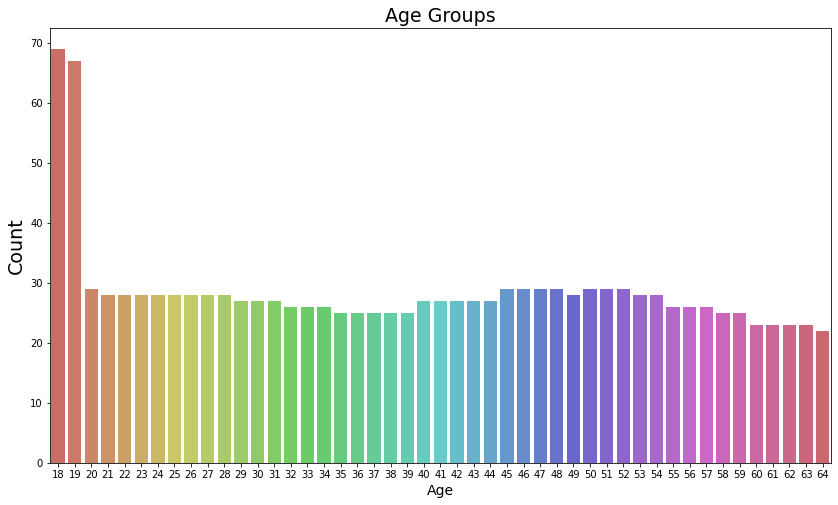

In [31]:
plt.figure(figsize = (14,8))
p= sns.countplot(x="age",data=dataframe1,palette='hls')
p.set_title("Age Groups", fontsize=19)
p.set_ylabel("Count", fontsize=19)
p.set_xlabel("Age", fontsize=14)


***Plot of different regions***

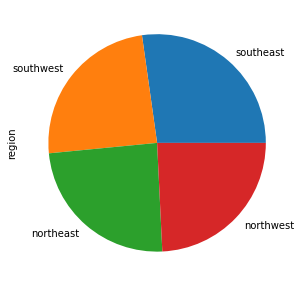

In [37]:
plt.figure(figsize = (7,5))
dataframe1.region.value_counts().plot(kind="pie")

***Plot of smokers***

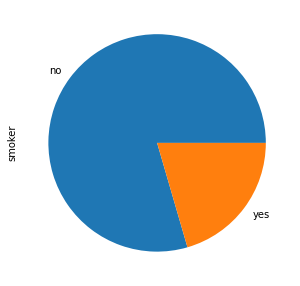

In [38]:
plt.figure(figsize = (7,5))
dataframe1.smoker.value_counts().plot(kind="pie")

***Plot of gender***

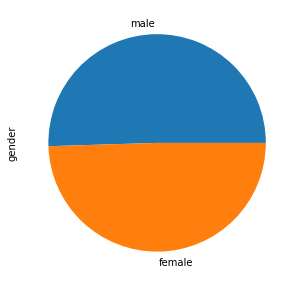

In [39]:
plt.figure(figsize = (7,5))
dataframe1.gender.value_counts().plot(kind="pie")

***Plot of count of children***

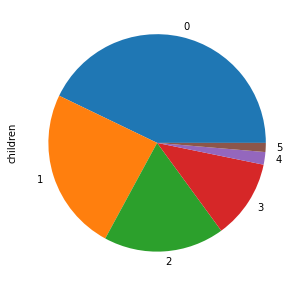

In [40]:
plt.figure(figsize = (7,5))
dataframe1.children.value_counts().plot(kind="pie")

***Correlation Heatmap of the Dataframe***

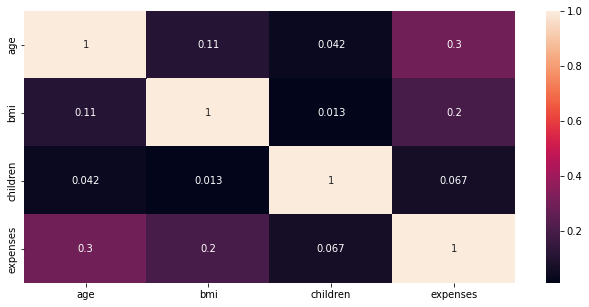

In [42]:
plt.figure(figsize=(11,5))
corr = dataframe1.corr()
ax = sns.heatmap(corr,annot=True)

From the above correlation and covariance values we see that there exist strong relationship between expenses. AGE (0.3) and BMI(0.2) for numerical variables

***Relation between bmi and expenses***

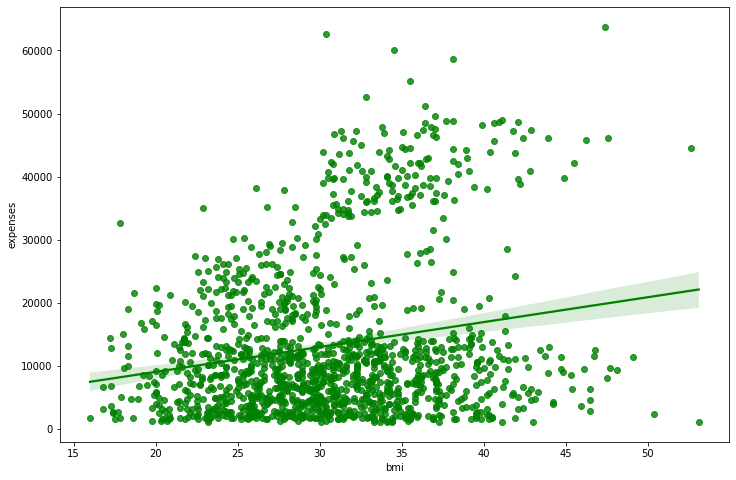

In [47]:
plt.figure(figsize=(12,8))
sns.regplot(x=dataframe1['bmi'], y=dataframe1['expenses'], color="green")

From the above plot we conclude that bmi and expenses are positively correlated.

***Relation between age and expenses***

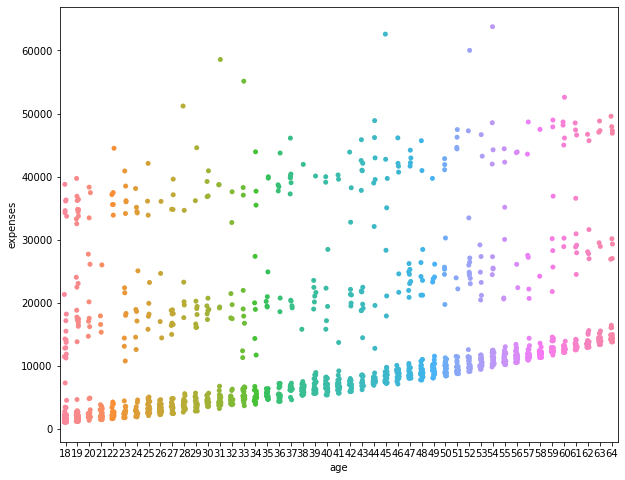

In [52]:
plt.figure(figsize=(10,8))
sns.stripplot(x=dataframe1['age'], y=dataframe1['expenses'])

***Relation between smoker and expenses.***   We see that non smokers pay less smokers.

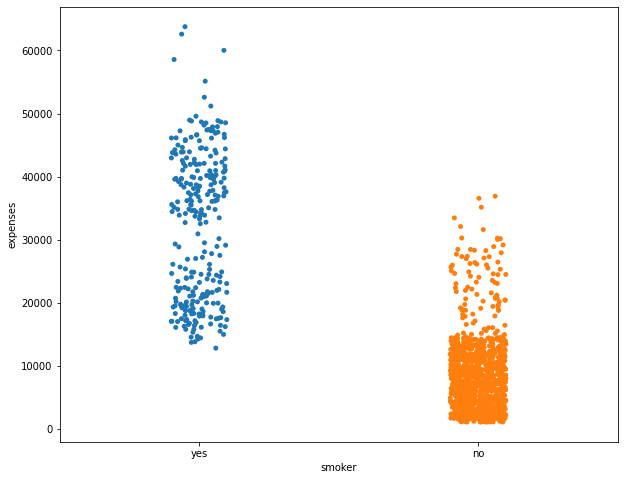

In [53]:
plt.figure(figsize=(10,8))
sns.stripplot(x=dataframe1['smoker'], y=dataframe1['expenses'])

***Use One Hot Encoding For Gender***

In [61]:
dummy = pd.get_dummies(dataframe1.gender)
dataframe2 = pd.concat([dataframe1,dummy],axis='columns')
dataframe2.drop(columns='gender',inplace=True)
dataframe2.head()

,age,bmi,children,smoker,region,expenses,female,male
0,19,27.9,0,yes,southwest,16884.92,1,0
1,18,33.8,1,no,southeast,1725.55,0,1
2,28,33.0,3,no,southeast,4449.46,0,1
3,33,22.7,0,no,northwest,21984.47,0,1
4,32,28.9,0,no,northwest,3866.86,0,1


***Use One Hot Encoding For Smoker***

In [62]:
dummy = pd.get_dummies(dataframe2.smoker)
dataframe3 = pd.concat([dataframe2,dummy],axis='columns')
dataframe3.drop(columns='smoker',inplace=True)
dataframe3.head()

,age,bmi,children,region,expenses,female,male,no,yes
0,19,27.9,0,southwest,16884.92,1,0,0,1
1,18,33.8,1,southeast,1725.55,0,1,1,0
2,28,33.0,3,southeast,4449.46,0,1,1,0
3,33,22.7,0,northwest,21984.47,0,1,1,0
4,32,28.9,0,northwest,3866.86,0,1,1,0


***Use One Hot Encoding For Region***

In [63]:
dummy = pd.get_dummies(dataframe3.region)
dataframe4 = pd.concat([dataframe3,dummy],axis='columns')
dataframe4.drop(columns='region',inplace=True)
dataframe4.head()

,age,bmi,children,expenses,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


**Changing column names of yes and no to smoke_yes and smoke_no respectively**

In [65]:
dataframe4.rename(columns={'yes':'smoke_yes','no':'smoke_no'},inplace=True,level=None)
dataframe4.head(2)

,age,bmi,children,expenses,female,male,smoke_no,smoke_yes,northeast,northwest,southeast,southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0


**Now making the linear regression model**

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [68]:
X = dataframe4.drop(['expenses'],axis='columns')
y = dataframe4.expenses

In [69]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=10)

In [70]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [72]:
# Predicting the Test set results
y_pred=model.predict(test_X)
y_pred

array([ 4350.90969718,  4396.04059607, 11931.3217768 , 12103.97154052,
       33695.43591397,  5716.75459111, 11635.75367889,  3391.07136792,
       38082.49043171, 15775.28932758, 10021.08963359,  3278.70544043,
        4534.30887247, 30289.23803843, 34330.29750662, 30347.64362886,
        5694.74219396,  9063.39507992,  6515.87154428,  5846.19770172,
       28124.97194722,  9689.7805115 , 27837.26416304,  8385.91958912,
        6509.23972044,  4161.74021941, 32754.75106601,  8648.94625281,
        6458.44449733,  7268.02162289,  8158.84323698, 10915.45680863,
       11667.96714858,  9411.35845142,  8245.62428202, 10790.12022025,
       14614.16399783,  8582.88750016, 13905.163809  , 11083.0895812 ,
        1266.37731863, 30761.89899588,  5435.81046602,  1992.3352765 ,
       10832.90309884, 14528.34346819, 13462.15628801, 36369.1487258 ,
       34737.27103825,   951.34040889, 11866.19179842, 14249.02387324,
        9036.26047187, 37094.66219874, 12742.2196791 , 10381.48799427,
      

In [73]:
#Rsquared value
r2_score(test_y,y_pred)

0.734226975381151

**Export the tested model to a pickle file**

In [75]:
import pickle
with open('insurance_premium_prediction_model.pickle','wb') as f:
    pickle.dump(model,f)